<a href="https://colab.research.google.com/github/bvchand/Diabetes-detection-in-ICU-patients/blob/main/diabetes_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
from fancyimpute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from sklearn.feature_selection import mutual_info_classif
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
cd '/content/drive/Shareddrives/CMPE-255_Project/widsdatathon2021'

/content/drive/Shareddrives/CMPE-255_Project/widsdatathon2021


In [38]:
KNN_imputed_trainX = pickle.load(open("KNN_imputed_trainX.pkl", "rb"))
KNN_imputed_testX = pickle.load(open("KNN_imputed_testX_df.pkl", "rb"))

diab_train_reduced = pickle.load(open("diab_train_reduced.pkl", "rb"))
diabetes_train = pickle.load(open("diabetes_train.pkl", "rb"))
# diab_train_target = diabetes_train['diabetes_mellitus']
diabetes_train_target = pickle.load(open("diabetes_train_y.pkl", "rb"))


# from sklearn.model_selection import train_test_split
# train_X,test_X,train_y,test_y = train_test_split(diab_train_reduced, diab_train_target, test_size=0.2)

In [39]:
KNN_imputed_trainX

,bmi,ethnicity,gender,height,hospital_admit_source,icu_admit_source,pre_icu_los_days,weight,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,...,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,age
115201,28.734672,0.0,1.0,173.00,3.0,0.0,0.072917,86.00,403.0,0.0,0.0,18.333333,0.927000,4.000000,6.0,0.0,5.0,151.483333,55.0,36.133333,0.0,140.0,8.0,137.333333,36.6,0.0,9.123000,119.0,56.0,119.0,56.0,83.0,56.0,140.0,80.0,140.0,80.0,22.0,8.0,99.0,...,80.000000,75.000000,64.0,124.000000,96.000000,124.000000,96.000000,18.000000,14.000000,98.0,96.000000,173.000000,140.000000,173.000000,140.000000,36.800000,36.800000,19.866667,18.466667,8.653333,8.550000,1.104667,1.064333,168.166667,115.9,25.766667,24.033333,12.293333,12.146667,36.803333,36.416667,213.466667,210.000000,4.073333,3.756667,137.933333,137.333333,9.983000,9.591333,60.000000
5903,30.295175,5.0,1.0,167.70,8.0,2.0,3.738889,85.20,1207.0,1.0,0.0,15.000000,0.960000,3.866667,5.9,1.0,4.3,124.000000,102.0,31.500000,0.0,160.0,36.0,137.000000,36.6,1.0,9.800000,100.0,36.0,100.0,36.0,102.0,72.0,114.0,59.0,114.0,59.0,28.0,0.0,100.0,...,49.000000,98.000000,84.0,102.000000,71.000000,102.000000,71.000000,23.000000,14.000000,100.0,95.000000,158.000000,108.000000,158.000000,108.000000,36.600000,36.600000,15.000000,15.000000,8.300000,8.300000,0.960000,0.960000,124.000000,124.0,21.000000,21.000000,10.800000,10.800000,31.500000,31.500000,123.000000,123.000000,4.400000,4.400000,137.000000,137.000000,9.800000,9.800000,73.000000
68265,44.123628,2.0,1.0,172.70,3.0,0.0,0.109722,131.60,301.0,0.0,0.0,10.000000,1.100000,1.000000,4.0,0.0,2.0,140.000000,109.0,38.600000,0.0,47.0,48.0,136.000000,36.3,0.0,8.600000,74.0,26.0,74.0,26.0,100.0,60.0,108.0,60.0,108.0,60.0,48.0,14.0,99.0,...,70.000000,76.000000,76.0,106.000000,106.000000,106.000000,106.000000,20.000000,18.000000,96.0,96.000000,161.000000,154.000000,161.000000,154.000000,36.300000,36.300000,10.000000,10.000000,8.400000,8.400000,1.100000,1.100000,140.000000,140.0,27.000000,27.000000,13.700000,13.700000,38.600000,38.600000,122.000000,122.000000,3.900000,3.900000,136.000000,136.000000,8.600000,8.600000,70.000000
109489,18.563897,2.0,1.0,195.59,3.0,0.0,0.340972,75.00,110.0,0.0,0.0,62.000000,1.820000,2.000000,5.0,0.0,2.0,157.000000,122.0,31.800000,0.0,156.0,27.0,137.000000,36.2,0.0,6.000000,152.0,58.0,152.0,58.0,122.0,86.0,156.0,70.0,156.0,70.0,27.0,13.0,100.0,...,79.000000,104.000000,102.0,118.000000,96.000000,118.000000,96.000000,21.000000,17.000000,98.0,92.000000,159.000000,147.000000,159.000000,147.000000,37.400000,37.400000,62.000000,54.000000,7.800000,6.900000,1.820000,1.670000,157.000000,109.0,22.000000,19.000000,10.300000,10.300000,31.800000,31.800000,76.000000,76.000000,4.800000,3.600000,141.000000,137.000000,6.000000,6.000000,68.000000
14762,22.500000,0.0,0.0,160.00,3.0,0.0,0.001389,57.60,107.0,0.0,0.0,41.000000,1.600000,4.000000,6.0,0.0,5.0,90.000000,98.0,36.000000,0.0,50.0,12.0,135.000000,36.8,1.0,13.470000,99.0,38.0,99

In [40]:
KNN_imputed_trainX = KNN_imputed_trainX[KNN_imputed_testX.columns]

In [35]:
# KNN_imputed_trainX['diabetes_mellitus'] = diabetes_train_target.values

In [41]:
KNN_imputed_trainX

,age,bmi,ethnicity,gender,height,hospital_admit_source,icu_admit_source,pre_icu_los_days,weight,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,...,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min
115201,60.000000,28.734672,0.0,1.0,173.00,3.0,0.0,0.072917,86.00,403.0,0.0,0.0,18.333333,0.927000,4.000000,6.0,0.0,5.0,151.483333,55.0,36.133333,0.0,140.0,8.0,137.333333,36.6,0.0,9.123000,119.0,56.0,119.0,56.0,83.0,56.0,140.0,80.0,140.0,80.0,22.0,8.0,...,97.0,80.000000,75.000000,64.0,124.000000,96.000000,124.000000,96.000000,18.000000,14.000000,98.0,96.000000,173.000000,140.000000,173.000000,140.000000,36.800000,36.800000,19.866667,18.466667,8.653333,8.550000,1.104667,1.064333,168.166667,115.9,25.766667,24.033333,12.293333,12.146667,36.803333,36.416667,213.466667,210.000000,4.073333,3.756667,137.933333,137.333333,9.983000,9.591333
5903,73.000000,30.295175,5.0,1.0,167.70,8.0,2.0,3.738889,85.20,1207.0,1.0,0.0,15.000000,0.960000,3.866667,5.9,1.0,4.3,124.000000,102.0,31.500000,0.0,160.0,36.0,137.000000,36.6,1.0,9.800000,100.0,36.0,100.0,36.0,102.0,72.0,114.0,59.0,114.0,59.0,28.0,0.0,...,94.0,49.000000,98.000000,84.0,102.000000,71.000000,102.000000,71.000000,23.000000,14.000000,100.0,95.000000,158.000000,108.000000,158.000000,108.000000,36.600000,36.600000,15.000000,15.000000,8.300000,8.300000,0.960000,0.960000,124.000000,124.0,21.000000,21.000000,10.800000,10.800000,31.500000,31.500000,123.000000,123.000000,4.400000,4.400000,137.000000,137.000000,9.800000,9.800000
68265,70.000000,44.123628,2.0,1.0,172.70,3.0,0.0,0.109722,131.60,301.0,0.0,0.0,10.000000,1.100000,1.000000,4.0,0.0,2.0,140.000000,109.0,38.600000,0.0,47.0,48.0,136.000000,36.3,0.0,8.600000,74.0,26.0,74.0,26.0,100.0,60.0,108.0,60.0,108.0,60.0,48.0,14.0,...,74.0,70.000000,76.000000,76.0,106.000000,106.000000,106.000000,106.000000,20.000000,18.000000,96.0,96.000000,161.000000,154.000000,161.000000,154.000000,36.300000,36.300000,10.000000,10.000000,8.400000,8.400000,1.100000,1.100000,140.000000,140.0,27.000000,27.000000,13.700000,13.700000,38.600000,38.600000,122.000000,122.000000,3.900000,3.900000,136.000000,136.000000,8.600000,8.600000
109489,68.000000,18.563897,2.0,1.0,195.59,3.0,0.0,0.340972,75.00,110.0,0.0,0.0,62.000000,1.820000,2.000000,5.0,0.0,2.0,157.000000,122.0,31.800000,0.0,156.0,27.0,137.000000,36.2,0.0,6.000000,152.0,58.0,152.0,58.0,122.0,86.0,156.0,70.0,156.0,70.0,27.0,13.0,...,111.0,79.000000,104.000000,102.0,118.000000,96.000000,118.000000,96.000000,21.000000,17.000000,98.0,92.000000,159.000000,147.000000,159.000000,147.000000,37.400000,37.400000,62.000000,54.000000,7.800000,6.900000,1.820000,1.670000,157.000000,109.0,22.000000,19.000000,10.300000,10.300000,31.800000,31.800000,76.000000,76.000000,4.800000,3.600000,141.000000,137.000000,6.000000,6.000000
14762,51.000000,22.500000,0.0,0.0,160.00,3.0,0.0,0.001389,57.60,107.0,0.0,0.0,41.000000,1.600000,4.000000,6.0,0.0,5.0,90.000000,98.0,36.000000,0.0,50.0,12.0,135.000000,36.8,1.0

In [42]:
KNN_imputed_testX

,age,bmi,ethnicity,gender,height,hospital_admit_source,icu_admit_source,pre_icu_los_days,weight,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,...,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min
71328,61.995103,28.178382,2.0,0.0,157.5,15.0,0.0,0.338889,69.900000,502.0,0.0,0.0,41.0,2.220000,4.0,6.0,0.0,4.0,141.000000,119.0,33.360000,0.0,62.0,47.0,137.0,36.7,0.0,14.176333,60.0,51.0,60.0,51.0,104.0,82.0,86.0,64.0,86.0,64.0,32.0,15.0,...,59.0,59.0,91.0,91.0,85.0,85.0,85.0,85.0,32.0,32.0,98.0,98.0,152.0,152.0,152.0,152.0,36.700000,36.700000,41.000000,36.000000,8.000000,7.900000,2.220000,1.730000,141.0,123.000000,22.806667,21.833333,12.200000,12.200000,37.000000,37.000000,87.000000,87.000000,4.000000,3.400000,137.000000,137.000000,40.300000,40.300000
107114,74.000000,21.593341,1.0,0.0,145.0,15.0,0.0,0.005556,45.400000,704.0,0.0,0.0,13.0,1.040000,4.0,6.0,0.0,5.0,100.000000,49.0,37.616667,0.0,142.0,12.0,117.0,36.8,0.0,8.747667,112.0,62.0,112.0,62.0,68.0,50.0,134.0,73.0,134.0,73.0,22.0,12.0,...,109.0,98.0,61.0,56.0,129.0,122.0,129.0,122.0,16.0,14.0,99.0,97.0,176.0,165.0,176.0,165.0,36.600000,36.600000,13.000000,13.000000,8.200000,8.200000,1.040000,1.040000,100.0,100.000000,24.833333,23.466667,13.336667,13.180000,39.016667,38.546667,216.366667,211.900000,4.100000,4.100000,130.000000,117.000000,9.153667,8.869667
33650,62.000000,30.957006,2.0,0.0,152.4,4.0,1.0,2.962500,71.900000,212.0,0.0,0.0,16.0,0.630000,2.0,6.0,0.0,1.0,165.000000,45.0,31.300000,1.0,44.0,38.0,138.0,36.6,1.0,13.900000,100.0,31.0,100.0,31.0,109.0,46.0,118.0,61.0,118.0,61.0,40.0,9.0,...,71.0,31.0,62.0,46.0,113.0,44.0,113.0,44.0,20.0,20.0,99.0,95.0,201.0,67.0,201.0,67.0,36.600000,36.600000,16.000000,15.000000,7.700000,6.900000,0.740000,0.630000,165.0,116.000000,25.000000,24.000000,10.800000,10.100000,31.300000,29.100000,161.000000,137.000000,3.700000,3.500000,138.000000,135.000000,13.900000,10.600000
119933,77.000000,20.338409,2.0,0.0,154.9,3.0,0.0,0.074306,48.800000,102.0,0.0,0.0,19.0,0.300000,1.0,1.0,0.0,1.0,98.000000,107.0,34.180000,1.0,135.0,4.0,143.0,36.1,1.0,9.857667,72.0,35.0,72.0,35.0,101.0,72.0,126.0,48.0,126.0,48.0,24.0,10.0,...,56.0,35.0,84.0,76.0,106.0,48.0,106.0,48.0,19.0,13.0,100.0,99.0,128.0,79.0,128.0,79.0,36.100000,36.100000,19.000000,14.000000,9.400000,8.800000,0.500000,0.300000,158.0,98.000000,32.000000,26.000000,11.900000,11.900000,37.200000,37.200000,242.000000,242.000000,3.900000,3.600000,145.000000,139.000000,10.000000,10.000000
3395,51.000000,27.158698,2.0,1.0,172.7,2.0,0.0,0.003472,80.485333,408.0,0.0,0.0,23.0,0.960000,3.0,5.0,0.0,4.0,89.000000,103.0,37.300000,0.0,75.0,43.0,145.0,37.3,0.0,9.300000,86.0,56.0,86.0,56.0,109.0,81.0,95.0,75.0,95.0,75.0,31.0,20.0,...,68.0,68.0,84.0,84.0,87.0,75.0,87.0,75.0,24.0,24.0,94.0,94.0,116.0,116.0,116.0,116.0,37.300000,37.300000,23.000000,20.000000,8.800000,8.800000,1.080000,0.960000,94.0,89.000000,28.000000,26.000000,12.300000,12.200000,37.800000,37.300000,208.000000,208.0




# Dimensionality-reduction method 
# PCA -principal components Analysis

In [48]:
#PCA

# Apply standardization before applying PCA
scaler = StandardScaler()
scaled = scaler.fit_transform(KNN_imputed_trainX)

#choose 95 percent variance
pca = PCA(.95)

principalComponents = pca.fit_transform(scaled)
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,6.452907,-0.123875,1.715045,1.374406,0.129111,-1.545458,-0.945817,-0.626594,-0.342727,-0.517970,-0.401344,-0.793012,0.502258,1.229688,0.919376,-0.175299,-0.547221,-0.043702,0.136378,-0.173587,-0.475941,0.173707,0.397067,0.585213,-0.379229,0.230493,1.125010,-0.828673,0.731378,0.144471,0.231965,0.170891,-0.203107,0.140893,0.135945,-0.189096,0.537571,-0.494697,-0.120094,-0.223589,0.086711,-0.088925,-0.090389,0.208713,0.376182,-0.246387,0.654475
1,-0.060532,0.652419,-0.258668,2.640138,-1.979604,-0.580156,-1.476326,-1.914418,-2.423275,-0.038167,1.420617,0.812119,0.471990,-1.121100,-1.308645,-0.371012,-0.620748,-0.130478,-0.683598,0.067077,-1.233337,-3.513215,-2.823783,5.067822,2.955681,-1.583517,-1.146338,1.467254,-3.442043,3.984525,-1.414013,1.729819,1.267804,1.136738,-0.348979,-0.934544,0.775620,-0.709275,-0.384504,0.081797,0.303121,-0.756340,-0.290395,-0.950306,0.632840,0.241542,0.548400
2,2.422235,-0.230352,-0.471790,1.815154,1.850553,-0.384243,0.950870,0.203315,-0.358781,3.538882,-0.878103,0.638519,0.135855,-1.948936,0.565980,-1.972987,1.982970,0.624436,-1.026379,-1.652452,-0.071638,1.112115,0.000734,-1.806827,-0.947035,-0.183743,-0.356715,0.023904,-0.505640,2.188650,-0.499172,0.252711,1.389193,0.337745,0.132599,-0.428002,-1.366602,0.374466,-0.521288,-0.649020,0.275012,-0.034718,-0.340462,0.452543,0.227010,-0.138408,0.734511
3,4.983498,5.722925,0.504555,0.457623,-1.386766,-1.449315,2.733265,-0.400387,-2.578875,-0.974632,-0.517738,-1.128401,1.616971,1.689028,1.413258,0.177365,-1.774470,-0.671564,-1.131203,0.048144,1.899010,-0.078760,-0.193991,-0.181897,-0.746794,-0.217400,0.105576,-0.233886,-0.029520,0.100522,-0.702164,1.000465,-0.204525,0.371200,-0.389623,-0.395444,-0.740482,-1.350735,0.038868,-1.212344,-0.085981,0.300556,0.928075,0.458627,0.150507,0.497174,-0.941940
4,-1.371017,0.579256,-0.146201,0.718443,1.746672,-1.993862,-0.760203,0.361161,-0.413870,-1.480643,-1.467076,0.118898,-0.559917,-1.232097,0.271049,-0.161683,-0.293821,-1.107979,-0.410719,1.272132,-0.637745,0.575218,-1.076707,0.120489,-0.326564,0.706627,1.705589,-1.064083,0.615948,-0.190818,-0.149306,-1.142462,-0.048380,0.426733,0.398658,0.446475,0.098790,0.039283,0.092617,0.334715,-0.050749,-0.658227,0.493593,-0.708534,0.406725,1.245063,-0.181179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104120,-0.433967,1.317423,-1.671137,0.722930,-0.801144,-0.767256,1.315240,0.999132,1.575671,1.520643,1.087113,1.163290,-2.824350,-0.209321,-0.400778,0.611149,-1.641061,0.707873,0.540187,1.004650,0.272442,-1.066152,-0.145733,-0.038697,-0.489165,2.661037,1.162127,1.632736,0.524518,-0.882217,-0.433934,1.182170,0.276318,0.798511,0.488191,0.320688,-0.312201,-0.099205,-0.371551,0.045301,-0.152226,0.400981,1.478860,-0.381362,1.948908,0.247939,-0.591144
104121,1.664079,-0.559938,-1.568554,0.413769,-0.557649,-1.789197,1.224373,0.070981,0.105839,-2.056989,0.178210,-0.978556,-0.293433,-0.825204,-0.261047,1.170654,0.594648,-0.391144,-0.712088,0.736671,0.871515,-0.278990,-1.534402,-1.739097,0.553162,-0.000530,1.453048,-0.613229,-1.170540,-0.760708,0.236506,-0.193835,0.338636,-0.479882,0.717155,0.464193,0.069053,0.029465,-0.178310,-0.239581,0.423101,0.147004,0.757959,0.259228,-0.693768,-0.310469,0.115030
104122,-0.454056,-3.033392,2.199187,-1.113082,1.470355,0.267458,0.443243,0.228329,-0.544432,-0.422606,-0.054223,0.375011,-0.000504,1.326506,2.992584,-0.303869,-0.509488,-0.272043,0.503508,0.266414,-0.869976,-0.420876,0.772604,-0.021270,-0.215127,-1.457096,-0.115416,0.164165,0.357927,1.384894,0.896633,-0.242784,-0.274508,0.213816,0.628970,0.755424,0.498097,0.016017,-0.039248,0.357665,-0.349892,0.222109,0.517619,-0.046866,-0.290798,0.055624,0.050216
104123,0.215350,6.683285,-2.660034,-0.772830,2.439490,2.836267,1.27738

In [50]:
pickle.dump(principalDf, open("pca_95per_train.pkl", "wb"))

pca_95per_test_df = pd.DataFrame(pca.transform(KNN_imputed_testX))
print(pca_95per_test_df)
pickle.dump(pca_95per_test_df, open("pca_95per_test.pkl", "wb"))


               0           1           2   ...         44         45          46
0      419.210253  206.543198  -86.487805  ... -25.531679  17.047007 -104.177716
1      578.410130  189.691522  -49.593150  ... -27.078719 -13.451223  -88.787039
2      436.117265  254.334054  -89.656518  ... -24.453833  -1.494999 -102.899489
3      411.640735  228.847883 -128.874080  ...  -3.839624  -3.898394  -96.338791
4      437.935294  176.439020 -107.007215  ... -12.007064 -14.473703 -108.942974
...           ...         ...         ...  ...        ...        ...         ...
26027  429.456549  172.429185  -70.683181  ... -11.332724  11.467639  -91.334286
26028  318.848413  142.080835  -71.151343  ...  -2.247542  -3.441828 -101.264199
26029  424.139039  140.461702 -101.519632  ... -16.944528 -32.085812 -111.611029
26030  564.475372  253.751090 -106.035946  ... -31.284177 -34.305894 -128.915205
26031  555.402397  253.463436 -155.039946  ... -36.536983  -8.526110 -108.752719

[26032 rows x 47 columns]


In [51]:
#choose 97 percent variance
pca = PCA(.97)

principalComponents = pca.fit_transform(scaled)
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
0,6.452907,-0.123875,1.715045,1.374406,0.129111,-1.545458,-0.945817,-0.626594,-0.342727,-0.517970,-0.401344,-0.793012,0.502258,1.229688,0.919376,-0.175299,-0.547221,-0.043702,0.136378,-0.173587,-0.475941,0.173707,0.397067,0.585213,-0.379229,0.230493,1.125010,-0.828673,0.731378,0.144471,0.231965,0.170891,-0.203107,0.140893,0.135945,-0.189096,0.537571,-0.494697,-0.120094,-0.223589,0.086711,-0.088925,-0.090389,0.208713,0.376182,-0.246387,0.654475,0.124830,-0.259396,0.132649,0.194794,0.008908,-0.074270
1,-0.060532,0.652419,-0.258668,2.640138,-1.979604,-0.580156,-1.476326,-1.914418,-2.423275,-0.038167,1.420617,0.812119,0.471990,-1.121100,-1.308645,-0.371012,-0.620748,-0.130478,-0.683598,0.067077,-1.233337,-3.513215,-2.823783,5.067822,2.955681,-1.583517,-1.146338,1.467254,-3.442043,3.984525,-1.414013,1.729819,1.267804,1.136738,-0.348979,-0.934544,0.775620,-0.709275,-0.384504,0.081797,0.303121,-0.756340,-0.290395,-0.950306,0.632840,0.241542,0.548400,-0.019040,1.470182,0.218320,0.058556,0.564123,0.189719
2,2.422235,-0.230352,-0.471790,1.815154,1.850553,-0.384243,0.950870,0.203315,-0.358781,3.538882,-0.878103,0.638519,0.135855,-1.948936,0.565980,-1.972987,1.982970,0.624436,-1.026379,-1.652452,-0.071638,1.112115,0.000734,-1.806827,-0.947035,-0.183743,-0.356715,0.023904,-0.505640,2.188650,-0.499172,0.252711,1.389193,0.337745,0.132599,-0.428002,-1.366602,0.374466,-0.521288,-0.649020,0.275012,-0.034718,-0.340462,0.452543,0.227010,-0.138408,0.734511,0.735625,-0.591249,-0.478332,0.597826,0.562390,-0.109029
3,4.983498,5.722925,0.504555,0.457623,-1.386766,-1.449315,2.733265,-0.400387,-2.578875,-0.974632,-0.517738,-1.128401,1.616971,1.689028,1.413258,0.177365,-1.774470,-0.671564,-1.131203,0.048144,1.899010,-0.078760,-0.193991,-0.181897,-0.746794,-0.217400,0.105576,-0.233886,-0.029520,0.100522,-0.702164,1.000465,-0.204525,0.371200,-0.389623,-0.395444,-0.740482,-1.350735,0.038868,-1.212344,-0.085981,0.300556,0.928075,0.458627,0.150507,0.497174,-0.941940,-0.312161,0.420736,-0.735438,0.294366,-0.206546,0.056348
4,-1.371017,0.579256,-0.146201,0.718443,1.746672,-1.993862,-0.760203,0.361161,-0.413870,-1.480643,-1.467076,0.118898,-0.559917,-1.232097,0.271049,-0.161683,-0.293821,-1.107979,-0.410719,1.272132,-0.637745,0.575218,-1.076707,0.120489,-0.326564,0.706627,1.705589,-1.064083,0.615948,-0.190818,-0.149306,-1.142462,-0.048380,0.426733,0.398658,0.446475,0.098790,0.039283,0.092617,0.334715,-0.050749,-0.658227,0.493593,-0.708534,0.406725,1.245063,-0.181179,-0.019550,-0.525488,0.640087,-0.155691,0.519477,-0.100778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104120,-0.433967,1.317423,-1.671137,0.722930,-0.801144,-0.767256,1.315240,0.999132,1.575671,1.520643,1.087113,1.163290,-2.824350,-0.209321,-0.400778,0.611149,-1.641061,0.707873,0.540187,1.004650,0.272442,-1.066152,-0.145733,-0.038697,-0.489165,2.661037,1.162127,1.632736,0.524518,-0.882217,-0.433934,1.182170,0.276318,0.798511,0.488191,0.320688,-0.312201,-0.099205,-0.371551,0.045301,-0.152226,0.400981,1.478860,-0.381362,1.948908,0.247939,-0.591144,0.014825,0.151805,-1.465641,0.159456,-0.856679,0.322107
104121,1.664079,-0.559938,-1.568554,0.413769,-0.557649,-1.789197,1.224373,0.070981,0.105839,-2.056989,0.178210,-0.978556,-0.293433,-0.825204,-0.261047,1.170654,0.594648,-0.391144,-0.712088,0.736671,0.871515,-0.278990,-1.534402,-1.739097,0.553162,-0.000530,1.453048,-0.613229,-1.170540,-0.760708,0.236506,-0.193835,0.338636,-0.479882,0.717155,0.464193,0.069053,0.029465,-0.178310,-0.239581,0.423101,0.147004,0.757959,0.259228,-0.693768,-0.310469,0.115030,1.104865,-0.040808,-0.171170,0.231075,0.053412,0.035658
104122,-0.454056,-3.033392,2.199187,-1.113082,1.470355,0.267458,0.443243,0.228329,-0.

In [52]:
pickle.dump(principalDf, open("pca_97per_train.pkl", "wb"))

pca_97per_test_df = pd.DataFrame(pca.transform(KNN_imputed_testX))
print(pca_97per_test_df)
pickle.dump(pca_97per_test_df, open("pca_97per_test.pkl", "wb"))

               0           1           2   ...         50         51         52
0      419.210253  206.543198  -86.487805  ...   4.787284  -0.915827  11.666948
1      578.410130  189.691522  -49.593150  ...   8.678334   0.578491  14.840393
2      436.117265  254.334054  -89.656518  ...  16.128993  20.773454   2.326801
3      411.640735  228.847883 -128.874080  ...   8.938446 -23.473747  -0.805545
4      437.935294  176.439020 -107.007215  ...   3.151609  -0.249407  10.516660
...           ...         ...         ...  ...        ...        ...        ...
26027  429.456549  172.429185  -70.683181  ...   2.643235  -0.173657  11.247008
26028  318.848413  142.080835  -71.151343  ...   7.307353   1.453727  -2.953756
26029  424.139039  140.461702 -101.519632  ...   2.866864   0.387217  11.613517
26030  564.475372  253.751090 -106.035946  ...   4.931472  18.995092  12.907119
26031  555.402397  253.463436 -155.039946  ...  17.998682   4.735390  12.943765

[26032 rows x 53 columns]


In [53]:
#choose 99 percent variance
pca = PCA(.99)

principalComponents = pca.fit_transform(scaled)
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
0,6.452907,-0.123875,1.715045,1.374406,0.129111,-1.545458,-0.945817,-0.626594,-0.342727,-0.517970,-0.401344,-0.793012,0.502258,1.229688,0.919376,-0.175299,-0.547221,-0.043702,0.136378,-0.173587,-0.475941,0.173707,0.397067,0.585213,-0.379229,0.230493,1.125010,-0.828673,0.731378,0.144471,0.231965,0.170891,-0.203107,0.140893,0.135945,-0.189096,0.537571,-0.494697,-0.120094,-0.223589,0.086711,-0.088925,-0.090389,0.208713,0.376182,-0.246387,0.654475,0.124830,-0.259396,0.132649,0.194794,0.008908,-0.074270,-0.230875,0.059769,-0.355733,-0.436777,-0.033678,-0.019871,0.241926,-0.020613,-0.096020,0.012179,-0.348037,-0.246591,0.038659
1,-0.060532,0.652419,-0.258668,2.640138,-1.979604,-0.580156,-1.476326,-1.914418,-2.423275,-0.038167,1.420617,0.812119,0.471990,-1.121100,-1.308645,-0.371012,-0.620748,-0.130478,-0.683598,0.067077,-1.233337,-3.513215,-2.823783,5.067822,2.955681,-1.583517,-1.146338,1.467254,-3.442043,3.984525,-1.414013,1.729819,1.267804,1.136738,-0.348979,-0.934544,0.775620,-0.709275,-0.384504,0.081797,0.303121,-0.756340,-0.290395,-0.950306,0.632840,0.241542,0.548400,-0.019040,1.470182,0.218320,0.058556,0.564123,0.189719,-0.217882,0.192184,0.022518,-0.097140,-0.000127,-0.116359,0.084761,0.061318,-0.054246,-0.065721,0.404530,0.063516,-0.058841
2,2.422235,-0.230352,-0.471790,1.815154,1.850553,-0.384243,0.950870,0.203315,-0.358781,3.538882,-0.878103,0.638519,0.135855,-1.948936,0.565980,-1.972987,1.982970,0.624436,-1.026379,-1.652452,-0.071638,1.112115,0.000734,-1.806827,-0.947035,-0.183743,-0.356715,0.023904,-0.505640,2.188650,-0.499172,0.252711,1.389193,0.337745,0.132599,-0.428002,-1.366602,0.374466,-0.521288,-0.649020,0.275012,-0.034718,-0.340462,0.452543,0.227010,-0.138408,0.734511,0.735625,-0.591249,-0.478332,0.597826,0.562390,-0.109029,0.006305,-0.984895,0.229273,-0.254906,0.029469,-0.111297,0.145873,-0.076006,-0.003031,-0.070109,0.169163,0.013150,0.066315
3,4.983498,5.722925,0.504555,0.457623,-1.386766,-1.449315,2.733265,-0.400387,-2.578875,-0.974632,-0.517738,-1.128401,1.616971,1.689028,1.413258,0.177365,-1.774470,-0.671564,-1.131203,0.048144,1.899010,-0.078760,-0.193991,-0.181897,-0.746794,-0.217400,0.105576,-0.233886,-0.029520,0.100522,-0.702164,1.000465,-0.204525,0.371200,-0.389623,-0.395444,-0.740482,-1.350735,0.038868,-1.212344,-0.085981,0.300556,0.928075,0.458627,0.150507,0.497174,-0.941940,-0.312161,0.420736,-0.735438,0.294366,-0.206546,0.056348,-0.703667,-0.509014,-0.035655,0.310271,0.290749,0.091766,0.061404,0.161884,0.089683,0.107146,0.089299,0.220524,-0.449416
4,-1.371017,0.579256,-0.146201,0.718443,1.746672,-1.993862,-0.760203,0.361161,-0.413870,-1.480643,-1.467076,0.118898,-0.559917,-1.232097,0.271049,-0.161683,-0.293821,-1.107979,-0.410719,1.272132,-0.637745,0.575218,-1.076707,0.120489,-0.326564,0.706627,1.705589,-1.064083,0.615948,-0.190818,-0.149306,-1.142462,-0.048380,0.426733,0.398658,0.446475,0.098790,0.039283,0.092617,0.334715,-0.050749,-0.658227,0.493593,-0.708534,0.406725,1.245063,-0.181179,-0.019550,-0.525488,0.640087,-0.155691,0.519477,-0.100778,0.159143,-0.007155,0.185823,-0.012966,-0.089394,-0.267320,0.165627,0.302646,0.362686,-0.077289,0.035163,0.080100,-0.197339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104120,-0.433967,1.317423,-1.671137,0.722930,-0.801144,-0.767256,1.315240,0.999132,1.575671,1.520643,1.087113,1.163290,-2.824350,-0.209321,-0.400778,0.611149,-1.641061,0.707873,0.540187,1.004650,0.272442,-1.066152,-0.145733,-0.038697,-0.489165,2.661037,1.162127,1.632736,0.524518,-0.882217,-0.433934,1.182170,0.276318,0.798511,0.488191,0.320688,-0.312201,-0.099205,-0.371551,0.045301,-0.152226

In [55]:
pickle.dump(principalDf, open("pca_99per_train.pkl", "wb"))

pca_99per_test_df = pd.DataFrame(pca.transform(KNN_imputed_testX))
print(pca_99per_test_df)
pickle.dump(pca_99per_test_df, open("pca_99per_test.pkl", "wb"))

               0           1           2   ...         63         64          65
0      419.210253  206.543198  -86.487805  ...  12.953605  11.396813   91.378599
1      578.410130  189.691522  -49.593150  ...  19.401669  19.919737  149.595944
2      436.117265  254.334054  -89.656518  ... -19.179508   3.624795   37.637218
3      411.640735  228.847883 -128.874080  ... -15.160177   4.704601   13.392892
4      437.935294  176.439020 -107.007215  ...  -3.410947   8.174575   79.416305
...           ...         ...         ...  ...        ...        ...         ...
26027  429.456549  172.429185  -70.683181  ...   9.807109  13.429664  119.959358
26028  318.848413  142.080835  -71.151343  ...  -2.767655   5.256725   12.446395
26029  424.139039  140.461702 -101.519632  ...  11.481292  13.788739  119.807638
26030  564.475372  253.751090 -106.035946  ...   7.969667  12.971060  141.160354
26031  555.402397  253.463436 -155.039946  ...   6.306425  12.657172   96.958621

[26032 rows x 66 columns]


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


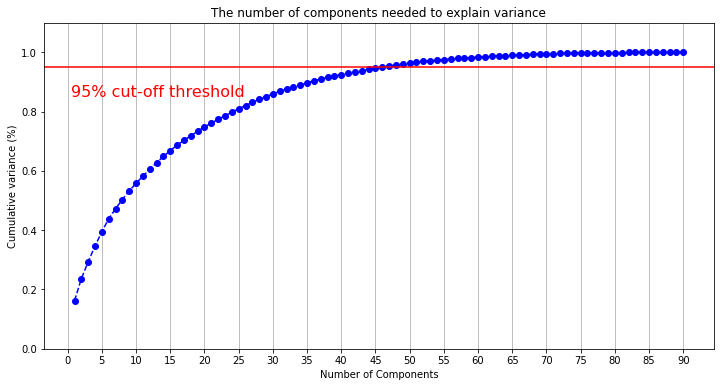

In [ ]:
pca = PCA().fit(scaled)

% matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 91, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

print(type(xi))
print(type(y))

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 91, step=5)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Based on the above plot we should not go below 47 columns because that will lead to less than 95 percent variance.

# Feature importance and selection

In [ ]:
sns.set(style='ticks')
pp = sns.pairplot(KNN_imputed_trainX)
pp.savefig("KNN_imputed_trainX_pairplot.png")

In [ ]:
Image(filename='KNN_imputed_trainX_pairplot.png', width = 1000, height = 500)

## 1. Feature importance using correlation

In [ ]:
diabetes_cor = KNN_imputed_trainX.corr()

In [ ]:
diabetes_cor

,bmi,ethnicity,gender,height,hospital_admit_source,icu_admit_source,pre_icu_los_days,weight,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,...,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,age,diabetes_mellitus
bmi,1.000000,-0.023401,-0.039587,-0.053590,0.009020,0.029049,0.001073,0.875796,-0.012359,0.012648,-0.004319,0.043949,0.063815,0.010241,0.017311,0.003888,0.028614,0.100280,-0.018466,0.088916,0.038163,0.058798,0.008079,-0.022918,0.037404,0.070064,0.026831,0.051458,-0.003357,0.051598,-0.004406,-0.027734,0.020817,0.060676,0.017404,0.061228,0.017609,0.012207,-0.008979,-0.066467,...,-0.013850,-0.000915,0.040015,0.024064,0.039935,0.024846,0.014110,0.002929,-0.057567,-0.031478,0.053675,0.045738,0.054750,0.046779,0.032134,0.037169,0.045776,0.050823,0.064501,0.068493,0.064982,0.066359,0.097484,0.129889,0.091312,0.088707,0.055239,0.060341,0.087114,0.088488,0.018557,0.019961,0.085461,0.090924,-0.026533,-0.017578,0.022560,0.023814,0.004858,0.002489
ethnicity,-0.023401,1.000000,0.022638,-0.052220,0.010357,0.020334,-0.013208,-0.043347,0.018828,0.021229,-0.036746,-0.024216,-0.066157,0.010883,0.009560,0.001303,0.008850,0.001707,-0.019285,0.022801,0.001677,-0.052549,-0.034401,-0.008834,0.018973,-0.004878,0.018988,-0.061831,-0.048771,-0.062243,-0.048527,-0.030209,-0.006870,-0.074295,-0.042700,-0.074744,-0.042621,-0.041849,0.021683,-0.048726,...,-0.021113,-0.014686,-0.063769,-0.060104,-0.063678,-0.059069,-0.024555,-0.002931,-0.029189,-0.002253,-0.050960,-0.041268,-0.049347,-0.040708,0.012495,0.011525,-0.025118,-0.024834,-0.060530,-0.055242,-0.070391,-0.073273,0.000500,0.011686,0.009814,0.009947,0.036417,0.034069,0.027313,0.025353,-0.013149,-0.015742,-0.014005,-0.011486,-0.012102,-0.007837,0.021446,0.016712,0.000107,0.005165
gender,-0.039587,0.022638,1.000000,0.672438,-0.000444,0.012642,-0.001342,0.247329,0.000324,0.025253,0.006240,0.060298,0.087905,-0.006587,-0.014141,0.014878,-0.005226,-0.009999,-0.035077,0.118995,0.038589,0.028167,-0.056268,-0.018165,0.003372,0.025345,-0.009696,0.017682,0.137541,0.017987,0.138628,-0.030482,-0.041664,0.011204,0.093899,0.011685,0.095548,-0.031309,-0.043307,-0.020154,...,-0.025782,-0.026816,0.038480,0.059073,0.039587,0.063764,-0.032315,-0.033248,-0.009378,0.003879,0.000689,0.010702,-0.000668,0.013627,0.004332,0.001055,0.061831,0.061538,0.005656,0.008339,0.089450,0.090940,-0.008549,0.001212,0.024661,0.019114,0.176406,0.151671,0.148485,0.124141,-0.112214,-0.114855,0.083562,0.088739,-0.018917,-0.022447,-0.003585,-0.015833,-0.000455,0.004378
height,-0.053590,-0.052220,0.672438,1.000000,-0.004185,0.006624,-0.008539,0.386883,0.015030,0.021776,-0.012807,0.014383,0.050003,-0.012746,-0.013249,0.005319,0.005159,-0.006274,-0.023238,0.117084,0.027426,0.036793,-0.053350,-0.019777,0.012108,0.010260,-0.008533,0.025082,0.144958,0.025063,0.145203,-0.020025,-0.023074,0.017335,0.102517,0.017120,0.103380,-0.027040,-0.054721,-0.023656,...,-0.011878,-0.013931,0.048632,0.071160,0.048565,0.074024,-0.037068,-0.049483,-0.010210,

In [ ]:
cols = diabetes_cor['diabetes_mellitus']>0.5

In [ ]:
cols

bmi                      False
ethnicity                False
gender                   False
height                   False
hospital_admit_source    False
                         ...  
d1_sodium_min            False
d1_wbc_max               False
d1_wbc_min               False
age                      False
diabetes_mellitus         True
Name: diabetes_mellitus, Length: 91, dtype: bool

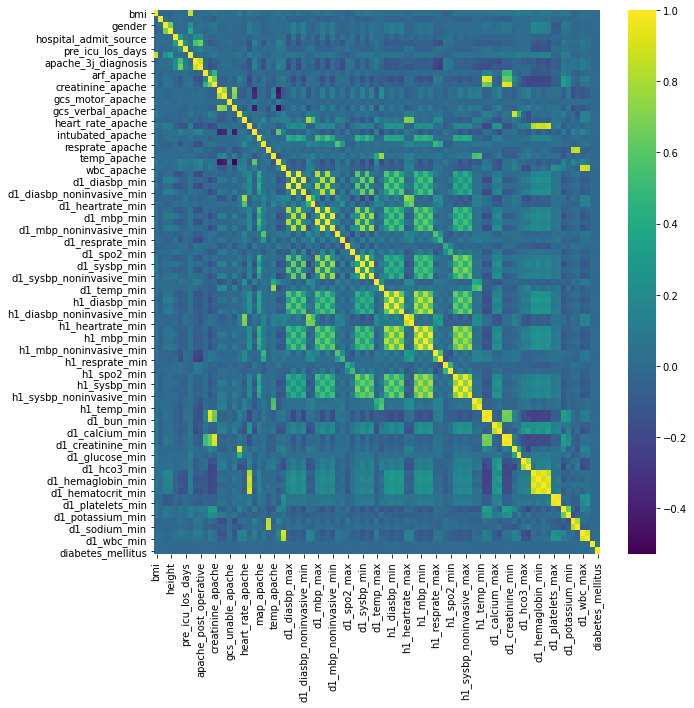

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(diabetes_cor, ax=ax, cmap='viridis')

In [ ]:
cor_target = abs(diabetes_cor["diabetes_mellitus"])

relevant_features = diabetes_cor[cor_target>0.5]
relevant_features['diabetes_mellitus']

diabetes_mellitus    1.0
Name: diabetes_mellitus, dtype: float64

In [ ]:
diabetes_cor.nlargest(10, ['diabetes_mellitus'])['diabetes_mellitus']

diabetes_mellitus    1.000000
age                  0.081696
h1_spo2_max          0.008282
d1_spo2_max          0.007924
ventilated_apache    0.005188
ethnicity            0.005165
gender               0.004378
heart_rate_apache    0.003895
d1_creatinine_min    0.003397
intubated_apache     0.003096
Name: diabetes_mellitus, dtype: float64

No features have a correlation above strongly correlated with target variable

## 2. Feature importance using backward elimination (p-values)

In [ ]:
train_X = KNN_imputed_trainX.drop(columns='diabetes_mellitus')
train_y = diabetes_train_target

In [ ]:
cols = list(train_X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    updated_X = train_X[cols]
    updated_X = sm.add_constant(updated_X)
    model = sm.OLS(list(train_y),updated_X).fit()
    pval = pd.Series(model.pvalues,index = cols)    
    pmax = max(pval)
    feature_with_p_max = pval.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
features_BE = cols
print(features_BE)

['sodium_apache', 'h1_diasbp_max', 'h1_spo2_max', 'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'age']


## 3. Feature importance using mutual information

In [ ]:
feature_scores = mutual_info_classif(train_X, train_y, random_state=42)

In [ ]:
mi_scores = pd.Series(feature_scores, index=train_X.columns)
mi_scores.nlargest(10)

ethnicity            0.010984
gcs_eyes_apache      0.009837
gcs_motor_apache     0.009801
gcs_verbal_apache    0.009242
age                  0.007745
d1_spo2_max          0.007688
h1_spo2_max          0.003706
gender               0.003532
icu_admit_source     0.003175
d1_hco3_min          0.002992
dtype: float64